## **INTRODUÇÃO**

Nessa atividade, realizamos a comparação, baseada no tempo, do desempenho de três algoritmos de otimização aplicados ao problema das caixas binárias: `busca aleatória`, `busca em grade` e `algoritmo genético`. Visamos, portanto, a obter um entendimento acerca dos três modelos e o quão eficientes eles são.

---

## **CÓDIGO**

O primeiro passo do código é a importação das bibliotecas necessárias e funções utilitárias definidas externamente.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from funcoes_monstros import cria_candidato_cb as cria_individuo
from funcoes_monstros import funcao_objetivo_cb as funcao_objetivo_ind
from funcoes_monstros import funcao_objetivo_pop_cb as funcao_objetivo
from funcoes_monstros import populacao_cb as cria_populacao
from funcoes_monstros import selecao_roleta_max as funcao_selecao
from funcoes_monstros import cruzamento_ponto_simples as funcao_cruzamento
from funcoes_monstros import mutacao_simples_cb as funcao_mutacao

Com o terreno já preparado, vamos definir os 3 modelos e dar uma melhor explicação sobre cada um:

#### ***BUSCA ALEATÓRIA***

A `busca aleatória` gera indivíduos aleatórios e guarda o melhor obtido a partir do fitness.

In [2]:
def busca_aleatoria(n_caixas, max_tentativas=10**4):
    melhor = None
    melhor_fitness = -1

    for _ in range(max_tentativas):
        candidato = cria_individuo(n_caixas)
        fitness = funcao_objetivo_ind(candidato)
        if fitness > melhor_fitness:
            melhor_fitness = fitness
            melhor = candidato

    return melhor

#### ***BUSCA EM GRADE***

A `busca em grade` gera todas as possíveis combinações para criação de indivíduos, buscando o que possua maior fitness.  

In [3]:
def busca_em_grade(n_caixas):
    melhor = None
    melhor_fitness = -1

    for bits in product([0, 1], repeat=n_caixas):
        candidato = list(bits)
        fitness = funcao_objetivo_ind(candidato)
        if fitness > melhor_fitness:
            melhor_fitness = fitness
            melhor = candidato

    return melhor

#### ***ALGORITMO GENÉTICO***

O `algoritmo genético` se baseia na criação de uma população e execução de um processo evolutivo baseado em gerações, achando o melhor indivíduo (após seleção, cruzamento e mutação) também baseado no fitness.

In [4]:
TAMANHO_POPULACAO = 10
NUM_GERACOES = 50
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

In [5]:
def algoritmo_genetico(n_caixas, tam_populacao = TAMANHO_POPULACAO, n_geracoes = NUM_GERACOES, tx_cruzamento = CHANCE_DE_CRUZAMENTO, tx_mutacao = CHANCE_DE_MUTACAO):
    populacao = cria_populacao(tam_populacao, n_caixas)
    
    hall_da_fama = []
    for n in range(n_geracoes):
        fitness = funcao_objetivo(populacao)        
        selecionados = funcao_selecao(populacao, fitness)

        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, tx_cruzamento)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
        
        funcao_mutacao(proxima_geracao, tx_mutacao)
        
        fitness = funcao_objetivo(proxima_geracao)
            
        maior_fitness = max(fitness)
        indice = fitness.index(maior_fitness)
        hall_da_fama.append(proxima_geracao[indice])    
        
        populacao = proxima_geracao

    fitness = funcao_objetivo(populacao)
    maior_fitness = max(fitness)
    indice = fitness.index(maior_fitness)
    melhor_individuo = populacao[indice]
    return melhor_individuo

Com todos os métodos já definidos, analisaremos e avaliaremos o tempo que cada um deles leva para a obtenção do melhor indivíduo possível após uma série de repetições. Com isso, definimos uma função de avaliação:

In [6]:
def avaliar(algoritmo, n_caixas, repeticoes=5):
    tempos = []
    fitnesses = []
    for _ in range(repeticoes):
        inicio = time.time()
        sol = algoritmo(n_caixas)
        fim = time.time()
        tempos.append(fim - inicio)
        fitnesses.append(funcao_objetivo_ind(sol))
    return np.mean(tempos), np.mean(fitnesses)

E utilizamos ela para avaliar o tempo e fitness obtidos em cada um dos métodos com uma variação no número de caixas:

In [7]:
n_caixas = list(range(4, 26, 1))
tempos_BA, tempos_BG, tempos_AG = [], [], []
fits_BA, fits_BG, fits_AG = [], [], []

for n in n_caixas:
    print(f"Avaliando n = {n}...")

    t_ba, f_ba = avaliar(busca_aleatoria, n)
    t_bg, f_bg = avaliar(busca_em_grade, n) #if n <= 20 else (np.nan, np.nan)  # por possuir um custo exponencial, para um grande nº de caixas, teríamos problemas
    t_ag, f_ag = avaliar(algoritmo_genetico, n)

    tempos_BA.append(t_ba)
    tempos_BG.append(t_bg)
    tempos_AG.append(t_ag)

    fits_BA.append(f_ba)
    fits_BG.append(f_bg)
    fits_AG.append(f_ag)

Avaliando n = 4...
Avaliando n = 5...


Avaliando n = 6...
Avaliando n = 7...
Avaliando n = 8...
Avaliando n = 9...
Avaliando n = 10...
Avaliando n = 11...
Avaliando n = 12...
Avaliando n = 13...
Avaliando n = 14...
Avaliando n = 15...
Avaliando n = 16...
Avaliando n = 17...
Avaliando n = 18...
Avaliando n = 19...
Avaliando n = 20...
Avaliando n = 21...
Avaliando n = 22...
Avaliando n = 23...
Avaliando n = 24...
Avaliando n = 25...


Como método de comparação analítica, plotamos gráficos associados ao tempo de execução média em relação ao número de caixas analisadas para cada modelo (Gráfico à Esquerda) e a "qualidade" da melhor solução obtida baseado no fitness médio (Gráfico à Direita):

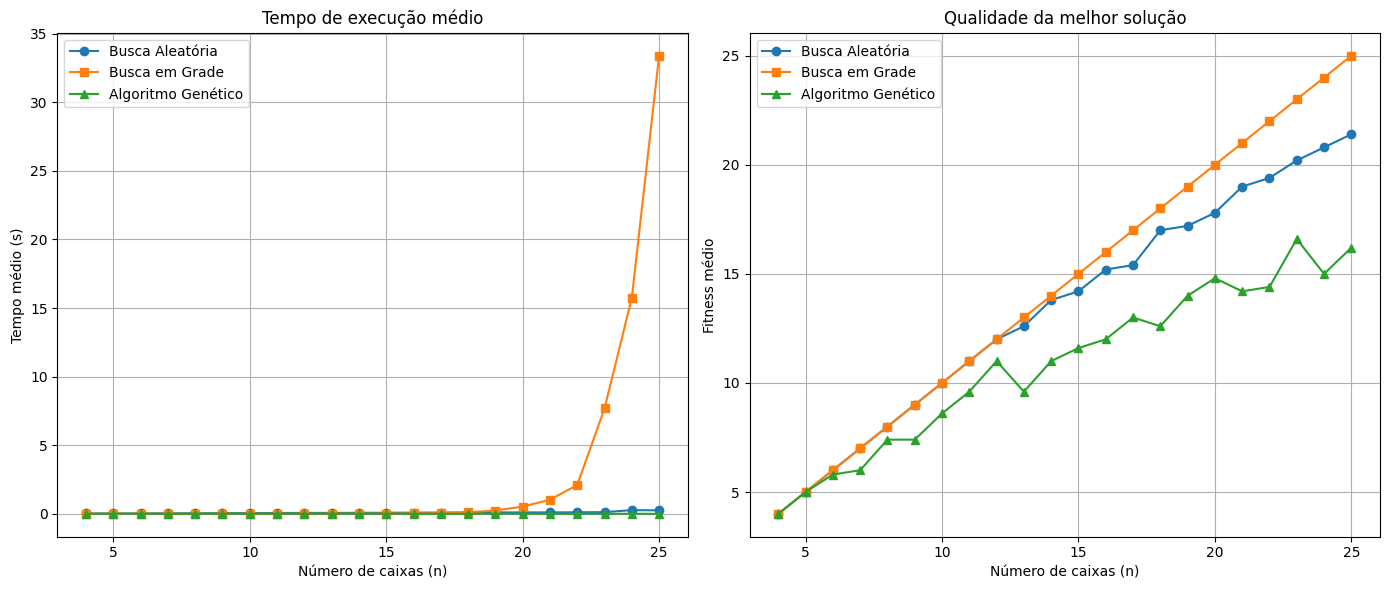

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_caixas, tempos_BA, 'o-', label='Busca Aleatória')
plt.plot(n_caixas, tempos_BG, 's-', label='Busca em Grade')
plt.plot(n_caixas, tempos_AG, '^-', label='Algoritmo Genético')
plt.xlabel('Número de caixas (n)')
plt.ylabel('Tempo médio (s)')
plt.title('Tempo de execução médio')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_caixas, fits_BA, 'o-', label='Busca Aleatória')
plt.plot(n_caixas, fits_BG, 's-', label='Busca em Grade')
plt.plot(n_caixas, fits_AG, '^-', label='Algoritmo Genético')
plt.xlabel('Número de caixas (n)')
plt.ylabel('Fitness médio')
plt.title('Qualidade da melhor solução')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

---

## **CONCLUSÃO**

A partir dos resultados obtidos, é possível observar que:

- A `Busca em Grade` apresenta o melhor desempenho (sem comparação) em termos de qualidade de solução obtida, dado que testa todas as possibilidades, mas é inviável para valores muito grandes de n devido ao seu aumento de custo exponencial.
- A `Busca Aleatória` é rápida, simples e dependente do seu número máximo de tentativas, podendo (muitas das vezes) encontrar soluções subótimas, especialmente se estiver analisando um domínio muito grande.
- O `Algoritmo Genético` consegue alcançar um bom equilíbrio entre tempo de execução e qualidade da solução, de forma que tende a encontrar boas soluções mesmo para valores maiores de n, mantendo um custo computacional razoável.

Dessa forma, nesse problema abordado (de caixas binárias) tanto o Algoritmo Genético, quanto a Busca Aleatória demonstram bons resultados de tempo em função de "qualidade". 

Entretanto, geralmente, o Algoritmo Genético se mostra mais escalável para instâncias grandes e mais diversas (a binarização desse problema específico ajuda um pouco a busca aleatória) do problema, sendo uma alternativa prática e eficiente se comparada às outras duas.

---

## **REFERÊNCIAS**

**[1]** CASSAR, Daniel. Redes Neurais e Algoritmos Genéticos. 2025. Material de Aula.

**[2]** CASSAR, Daniel. Lógica Computacional. 2024. Material de Aula.